In [ ]:
import pandas as pd

# Load the first dataset
df1 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

# Load the second dataset
df2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

# Concatenate both datasets into a single dataframe
df = pd.concat([df1, df2], ignore_index=True)

# Calculate the total number of headlines
total_headlines = len(df)

# Calculate the percentage of sarcastic and non-sarcastic headlines
num_sarcastic = df['is_sarcastic'].sum()
num_non_sarcastic = total_headlines - num_sarcastic
percentage_sarcastic = (num_sarcastic / total_headlines) * 100
percentage_non_sarcastic = (num_non_sarcastic / total_headlines) * 100

# Calculate the average headline length
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))
average_headline_length = df['headline_length'].mean()

# Find the minimum and maximum headline lengths
min_headline_length = df['headline_length'].min()
max_headline_length = df['headline_length'].max()

# Print the results
print("Total number of headlines:", total_headlines)
print("Percentage of sarcastic headlines:", percentage_sarcastic, "%")
print("Percentage of non-sarcastic headlines:", percentage_non_sarcastic, "%")
print("Average headline length:", average_headline_length, "words")
print("Minimum headline length:", min_headline_length, "words")
print("Maximum headline length:", max_headline_length, "words")

Total number of headlines: 55328
Percentage of sarcastic headlines: 45.83212839791787 %
Percentage of non-sarcastic headlines: 54.16787160208213 %
Average headline length: 9.951417004048583 words
Minimum headline length: 2 words
Maximum headline length: 151 words


In [ ]:
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

# Load the datasets and combine them
data_v1 = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
data_v2 = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
data = pd.concat([data_v1, data_v2])

# Data cleaning and preprocessing
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = ' '.join(word for word in words if word not in stop_words)

    return filtered_text

# Apply data cleaning function to 'headline' column
data['headline'] = data['headline'].apply(clean_text)

# Split the data into training and testing sets (80% training, 20% testing)
X = data['headline']
y = data['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag-of-Words representation of the headlines
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes classifier
clf_nb = MultinomialNB(alpha=1.0)
clf_nb.fit(X_train_bow, y_train)

# Train the Logistic Regression classifier
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train_bow, y_train)

# Train the Support Vector Machine classifier
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_bow, y_train)

# Make predictions on the test set with adjusted threshold
threshold = 0.5
y_pred_probs_nb = clf_nb.predict_proba(X_test_bow)
y_pred_probs_lr = clf_lr.predict_proba(X_test_bow)
y_pred_probs_svm = clf_svm.decision_function(X_test_bow)
y_pred_adjusted_nb = (y_pred_probs_nb[:, 1] > threshold).astype(int)
y_pred_adjusted_lr = (y_pred_probs_lr[:, 1] > threshold).astype(int)
y_pred_adjusted_svm = (y_pred_probs_svm > threshold).astype(int)

# Evaluate the models with the adjusted threshold
accuracy_nb = accuracy_score(y_test, y_pred_adjusted_nb)
accuracy_lr = accuracy_score(y_test, y_pred_adjusted_lr)
accuracy_svm = accuracy_score(y_test, y_pred_adjusted_svm)

print("Accuracy (Multinomial Naive Bayes):", accuracy_nb)
print("Accuracy (Logistic Regression):", accuracy_lr)
print("Accuracy (Support Vector Machine):", accuracy_svm)

report_nb = classification_report(y_test, y_pred_adjusted_nb)
print("Classification Report (Multinomial Naive Bayes):\n", report_nb)

report_lr = classification_report(y_test, y_pred_adjusted_lr)
print("Classification Report (Logistic Regression):\n", report_lr)

report_svm = classification_report(y_test, y_pred_adjusted_svm)
print("Classification Report (Support Vector Machine):\n", report_svm)

conf_matrix_nb = confusion_matrix(y_test, y_pred_adjusted_nb)
print("Confusion Matrix (Multinomial Naive Bayes):\n", conf_matrix_nb)

conf_matrix_lr = confusion_matrix(y_test, y_pred_adjusted_lr)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_lr)

conf_matrix_svm = confusion_matrix(y_test, y_pred_adjusted_svm)
print("Confusion Matrix (Support Vector Machine):\n", conf_matrix_svm)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Accuracy (Multinomial Naive Bayes): 0.8715886499186698
Accuracy (Logistic Regression): 0.8993312850171697
Accuracy (Support Vector Machine): 0.9060184348454726
Classification Report (Multinomial Naive Bayes):
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      5878
           1       0.87      0.85      0.86      5188

    accuracy                           0.87     11066
   macro avg       0.87      0.87      0.87     11066
weighted avg       0.87      0.87      0.87     11066

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5878
           1       0.91      0.87      0.89      5188

    accuracy                           0.90     11066
   macro avg       0.90      0.90      0.90     11066
weighted avg       0.90      0.90      0.90     11066

Classification Report (Support Vector Machine):
               precision    recall  f1-sco

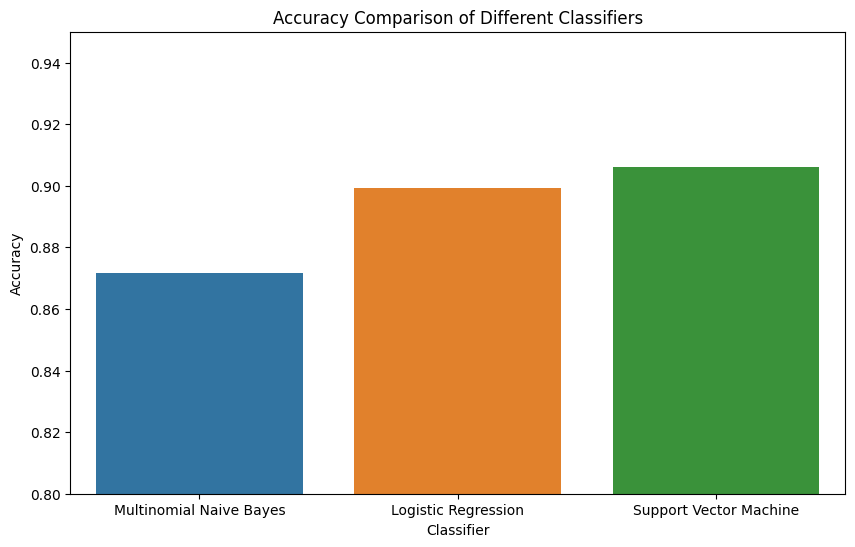

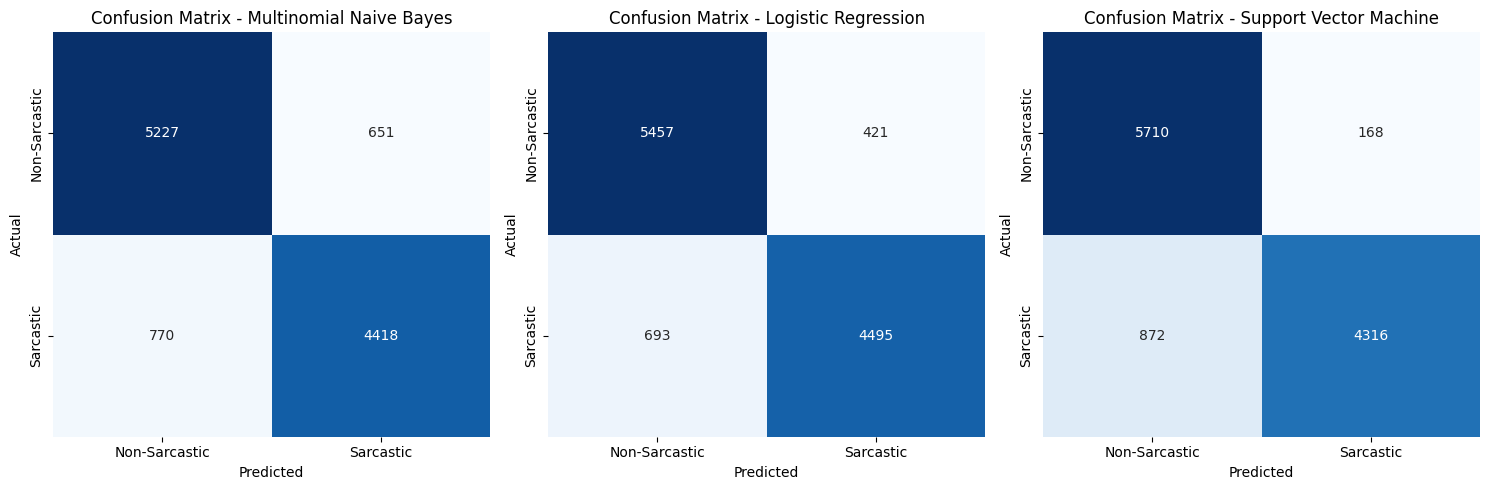

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy comparison
classifiers = ['Multinomial Naive Bayes', 'Logistic Regression', 'Support Vector Machine']
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm]

plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracies)
plt.ylim(0.8, 0.95)  # Set y-axis limits for better visualization
plt.title('Accuracy Comparison of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

# Plot confusion matrices
conf_matrices = [conf_matrix_nb, conf_matrix_lr, conf_matrix_svm]
class_names = ['Non-Sarcastic', 'Sarcastic']

plt.figure(figsize=(15, 5))
for i, matrix in enumerate(conf_matrices, start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {classifiers[i-1]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
